In [1]:
using Pkg
Pkg.activate("../.."); # Actives the environment at the root of the project
# Using our Carbon-I and vSmartMOM packages (developed by our team)

using CairoMakie, DelimitedFiles, Statistics, Interpolations
using Unitful, UnitfulEquivalences
include(joinpath("../../src/Plots", "CI_colorsNew.jl"));
set_theme!(theme_ggplot2())

  Activating project at `~/code/gitHub/CarbonI`


In [2]:
CarbonI_colors

In [4]:
# Read data from other notebooks
l1_3_fpa_cbe = readdlm("../../data/L1s/Level1-3-BaselineScenario_FPA_CBE.csv");
l1_4_fpa_cbe = readdlm("../../data/L1s/Level1-4-BaselineScenario_FPA_CBE.csv");
l1_3_fpa_req = readdlm("../../data/L1s/Level1-3-BaselineScenario_FPA_Req.csv");
l1_4_fpa_req = readdlm("../../data/L1s/Level1-4-BaselineScenario_FPA_Req.csv");

cbe_instrument_wl = l1_3_fpa_cbe[:, 1];
req_instrument_wl = l1_3_fpa_req[:, 1];
e_cbe_3 = l1_3_fpa_cbe[:, 2];
e_cbe_4 = l1_4_fpa_cbe[:, 2];
e_req_3 = l1_3_fpa_req[:, 2];
e_req_4 = l1_4_fpa_req[:, 2];


# Read data from other notebooks
l1_3_data = readdlm("../../data/L1s/L1-3_lines.dat");
l1_4_data = readdlm("../../data/L1s/L1-4_lines.dat");
TotalEfficiencies = l1_3_data[:, 1];

req_error_3 = readdlm("../../data/L1s/L1-3_req_error.dat")[1];
req_error_4 = readdlm("../../data/L1s/L1-4_req_error.dat")[1];
@show req_error_3

req_error_3 = 4.295299982419913


4.295299982419913

In [5]:
@show e_cbe_3
@show e_req_3

e_cbe_3 = [16500.970588683736, 16500.216060362312, 15647.838980887973, 13549.87762034726, 13023.838169798826, 11516.949434903467, 8422.642200885057, 10281.374816981515, 14026.843686496712, 14423.308619101666, 12370.910912969313, 10018.719266136675, 9997.47182260211, 12508.098489137587, 14818.13798603101, 15161.185817160798, 14199.163456725802, 12837.038701748848, 11570.093874844511, 10473.128122467806, 8587.70693837834, 7712.86365620413, 7921.5261243194445, 7652.3568165879815, 6969.212108121252, 5823.700106407932, 5751.439729364811, 6711.42759781335, 7019.768554608061, 6149.375572325167, 5836.487940560329, 6935.031147295614, 8138.453217238416, 9879.79527998232, 11204.268504372421, 10090.089409988346, 9335.495010084274, 8923.37484903185, 7330.723725385636, 7584.2936746909645, 8719.16864549949, 8826.161288252535, 8108.149101675262, 7393.626925121186, 8394.724925031423, 9464.547768206037, 8938.05386631474, 8465.34137087776, 7804.61642099297, 7380.451248765761, 8668.013642258446, 10005.011

469-element Vector{Float64}:
  8405.986290351093
  8582.015831681294
  9451.687123048256
 10010.494574448274
  9687.724267925343
  8983.337818321246
  8793.914312659783
  9447.5667386304
 10438.933663819524
 11020.713295874337
     ⋮
  5747.19315764207
  5140.246276090554
  4549.794566462055
  4485.125816952499
  5042.88934669423
  5560.415817302019
  5373.162485325507
  4573.450346498619
  3730.9545139288725

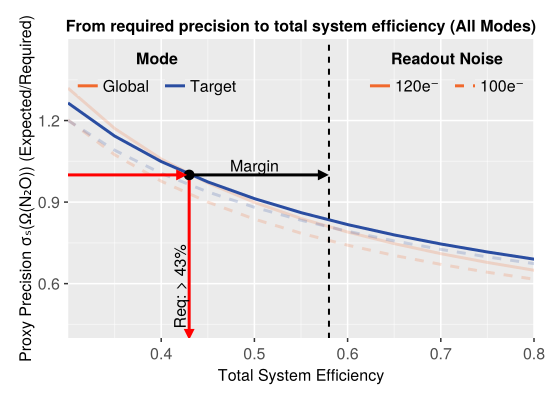

In [6]:
f = Figure(resolution=(550,400))
ax = Axis(f[1,1], xlabel="Total System Efficiency", ylabel="Proxy Precision σₛ(Ω(N₂O)) (Expected/Required)",  title="From required precision to total system efficiency (All Modes)")
# For CH4 (100 and 120e-)
al = 0.2
n2o_120_3 = lines!(ax, TotalEfficiencies, l1_3_data[:,3]/req_error_3, color=CarbonI_colors[5], linewidth=3, label="CH₄ (120e⁻)", alpha=al)
n2o_100_3 = lines!(ax, TotalEfficiencies, l1_3_data[:,2]/req_error_3, color=CarbonI_colors[5], linewidth=3, linestyle=:dash, label="CH₄ (100e⁻)", alpha=al)

# For CO2 (100 and 120e-)
n2o_120_4 = lines!(ax, TotalEfficiencies, l1_4_data[:,3]/req_error_4, color=CarbonI_colors[4], linewidth=3, label="CO₂ (120e⁻)")
n2o_100_4 = lines!(ax, TotalEfficiencies, l1_4_data[:,2]/req_error_4, color=CarbonI_colors[4], linewidth=3, linestyle=:dash, label="CO₂ (100e⁻)", alpha=al)


#lines!(ax, TotalEfficiencies, ones(length(TotalEfficiencies)), color=:black, linewidth=2, label="Requirement")

req_eff = 0.43
req_error = 1.0
eff_cbe = 0.58
arrows!(ax, [req_eff,],[req_error,],[0,],[-req_error+0.42,],arrowsize = 15, linewidth=3,color = color = :red)
text!(ax, "Req: > $(round(Int, 100req_eff))%", position = (req_eff, 0.59),
    align = (:center, :bottom), color = :black, rotation=π/2)


# Indicate Margins
arrows!(ax, [req_eff+0.002,],[req_error,],[eff_cbe-req_eff-0.01,],[0,],arrowsize = 15, linewidth=3, color = :black)
text!(ax, "Margin", position = (0.5, req_error),  align = (:center, :bottom), color = :black)
DR = scatter!(ax, [req_eff], [req_error], color=:black, markersize=15, label="Driving Req.")
arrows!(ax, [0.0,],[1,],[req_eff-0.01,],[0,],arrowsize = 15, linewidth=3, color = :red)
# Show CBE Total Efficiency
CBE = lines!(ax, [eff_cbe,eff_cbe], [0,1.5], color=:black, linestyle=:dash, linewidth=2, label="CBE")
axislegend(ax, [n2o_120_3, n2o_120_4], ["Global", "Target"], "Mode", position = :lt,
    orientation = :horizontal)
axislegend(ax, [n2o_120_3, n2o_100_3], ["120e⁻", "100e⁻"], "Readout Noise", position = :rt,
    orientation = :horizontal)

xlims!(ax,0.3,0.8)
ylims!(ax,0.4,1.5)
#axislegend(ax,position = :rt)
save("../../plots/final/Level1-3_4-EfficiencyDerivation_perMode.pdf",f)
f

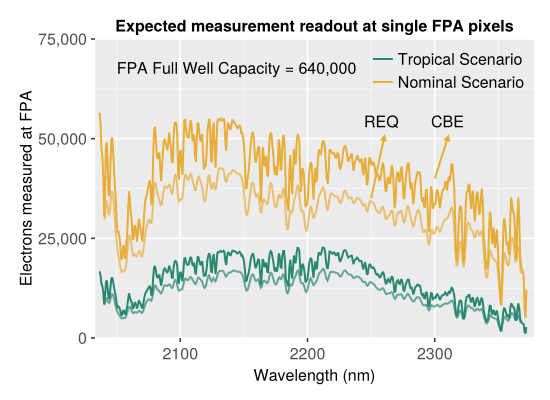

In [7]:
from_w_to_photons = 5.03e12
refRadiance = 1.0e16 # in photons/s/m²/nm

f = Figure(resolution=(550,400), backgroundcolor=:transparent)
ax = Axis(f[1,1], xlabel="Wavelength (nm)", ylabel="Electrons measured at FPA", yticks=(0:25:75, ["0","25,000", "50,000","75,000"]), title="Expected measurement readout at single FPA pixels")
#Label(f[1, 1, Top()], halign = :left, "x1000")
lines!(ax, cbe_instrument_wl,e_cbe_3/1000, color=CarbonI_colors[3], linewidth=2, label="Tropical Scenario")
lines!(ax, cbe_instrument_wl,e_cbe_4/1000, color=CarbonI_colors[1], linewidth=2, label="Nominal Scenario")
lines!(ax, req_instrument_wl,e_req_3/1000, color=CarbonI_colors[3], linewidth=2, alpha=0.7)
lines!(ax, req_instrument_wl,e_req_4/1000, color=CarbonI_colors[1], linewidth=2, alpha=0.7)
text!(ax, "FPA Full Well Capacity = 640,000", position=(2050.0,65.4),align = (:left, :bottom), color = :black)
arrows!(ax, [2300.0,],[40,],[10,],[10,],arrowsize = 10, linewidth=2,color = CarbonI_colors[1])
arrows!(ax, [2250.0,],[35,],[10,],[15,],arrowsize = 10, linewidth=2,color = CarbonI_colors[1], alpha=0.7)
text!(ax, "CBE", position=(2310.0,52),align = (:center, :bottom), color = :black)
text!(ax, "REQ", position=(2258.0,52),align = (:center, :bottom), color = :black)

#lines!(ax, [2035,2375], [refRadiance/ 1e16,refRadiance/ 1e16], color=:black, linestyle=:dash, linewidth=1, label="Reference Tropical Radiance")
xlims!(ax, 2033, 2378)
ylims!(ax, 0, 75)
axislegend(ax,position = :rt)
save("../../plots/final/Level1-3-4-Readout_FPA.pdf",f)
f

In [8]:
req_instrument_wl

469-element Vector{Float64}:
 2040.0
 2040.7
 2041.4
 2042.1
 2042.8
 2043.5
 2044.2
 2044.9
 2045.6
 2046.3
    ⋮
 2362.0
 2362.7
 2363.4
 2364.1
 2364.8
 2365.5
 2366.2
 2366.9
 2367.6